In [30]:
#Binary Classification problem (with mask or without mask)

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image

In [32]:
with_mask = os.listdir("/Users/navneetyadav/Documents/Face_Mask_Detection_Project/data/with_mask")
print(with_mask[0:5])
without_mask = os.listdir("/Users/navneetyadav/Documents/Face_Mask_Detection_Project/data/without_mask")
print(without_mask[0:5])

['with_mask_2140.jpg', 'with_mask_1449.jpg', 'with_mask_2626.jpg', 'with_mask_942.jpg', 'with_mask_3538.jpg']
['without_mask_3593.jpg', 'without_mask_2855.jpg', 'without_mask_1384.jpg', 'without_mask_1390.jpg', 'without_mask_2699.jpg']


In [33]:
print(len(with_mask),len(without_mask))

3725 3828


In [34]:
# Creating labels 0 and 1 depending on with mask or without mask
# with mask = 1
# without mask = 0

In [35]:
with_mask_labels = [1]*len(with_mask)
without_mask_labels = [0]*len(without_mask)
#print(without_mask_labels[0:5])

In [36]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


In [38]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [39]:
# Display the images

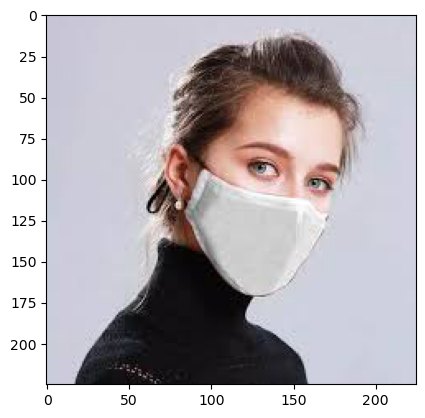

In [40]:
img = mpimg.imread("/Users/navneetyadav/Documents/Face_Mask_Detection_Project/data/with_mask/with_mask_2593.jpg")
imgplot = plt.imshow(img)
plt.show()

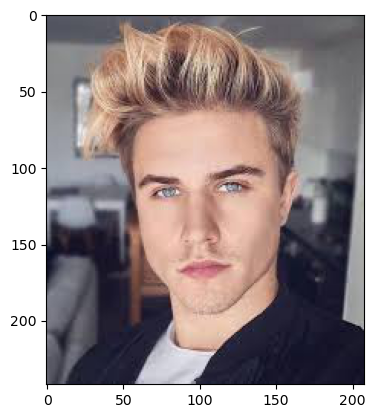

In [47]:
img = mpimg.imread("/Users/navneetyadav/Documents/Face_Mask_Detection_Project/data/without_mask/without_mask_2592.jpg")
imgplot = plt.imshow(img)
plt.show()

In [42]:
# Image Processing  
# 1. Resize the images
# 2. Convert the images into numpy array

In [49]:
with_mask_path = "/Users/navneetyadav/Documents/Face_Mask_Detection_Project/data/with_mask/"

data = []
for img_file in with_mask:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB') # because some images are of grayscale(black and white) 
                                 # so we need to convert all that to RGB so that they all are of one kind
    
    image = np.array(image)  # convert images to numpy arrays
    
#     imgplot = plt.imshow(image)
#     plt.show()
    
    data.append(image)
    
# similarly doing it for without mask
without_mask_path = "/Users/navneetyadav/Documents/Face_Mask_Detection_Project/data/without_mask/"

for img_file in without_mask:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB') # because some images are of grayscale(black and white) 
                                 # so we need to convert all that to RGB so that they all are of one kind
    
    image = np.array(image)  # convert images to numpy arrays
    data.append(image)

In [50]:
len(data)

7553

In [51]:
data[0].shape

(128, 128, 3)

In [52]:
# convert image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [53]:
print(X.shape,Y.shape)

(7553, 128, 128, 3) (7553,)


In [54]:
# Trian Test split 

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 7, test_size = 0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (6042,) (1511,)


In [56]:
# Scaling the data

In [57]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [59]:
X_train_scaled[0]

array([[[0.82352941, 0.83529412, 0.85490196],
        [0.79607843, 0.80784314, 0.82745098],
        [0.79215686, 0.80392157, 0.82352941],
        ...,
        [0.78039216, 0.79215686, 0.81176471],
        [0.78039216, 0.79607843, 0.8       ],
        [0.78039216, 0.79607843, 0.8       ]],

       [[0.82352941, 0.83529412, 0.85490196],
        [0.79607843, 0.80784314, 0.82745098],
        [0.79215686, 0.80392157, 0.82352941],
        ...,
        [0.78039216, 0.79215686, 0.81176471],
        [0.78039216, 0.79607843, 0.8       ],
        [0.78039216, 0.79607843, 0.8       ]],

       [[0.82352941, 0.83529412, 0.85490196],
        [0.79607843, 0.80784314, 0.82745098],
        [0.79215686, 0.80392157, 0.82352941],
        ...,
        [0.77647059, 0.78823529, 0.80784314],
        [0.77254902, 0.78823529, 0.79215686],
        [0.77254902, 0.78823529, 0.79215686]],

       ...,

       [[0.53333333, 0.5372549 , 0.55294118],
        [0.50196078, 0.50588235, 0.52156863],
        [0.49803922, 0

In [60]:
# Building a Convolution Neural Network (CNN)

In [61]:
import tensorflow as tf
from tensorflow import keras

In [62]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))  # soft max for multi class classification


/Users/navneetyadav/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:

# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [64]:
# training the neural network

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 24s 134ms/step - acc: 0.6822 - loss: 0.6645 - val_acc: 0.8942 - val_loss: 0.2682
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - acc: 0.8837 - loss: 0.3066 - val_acc: 0.8760 - val_loss: 0.2828
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 24s 139ms/step - acc: 0.9056 - loss: 0.2391 - val_acc: 0.9025 - val_loss: 0.2120
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - acc: 0.9352 - loss: 0.1719 - val_acc: 0.9190 - val_loss: 0.2034
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - acc: 0.9294 - loss: 0.1731 - val_acc: 0.9306 - val_loss: 0.1801


In [65]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test_accuracy =" ,accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.9338 - loss: 0.1928
Test_accuracy = 0.9404367804527283


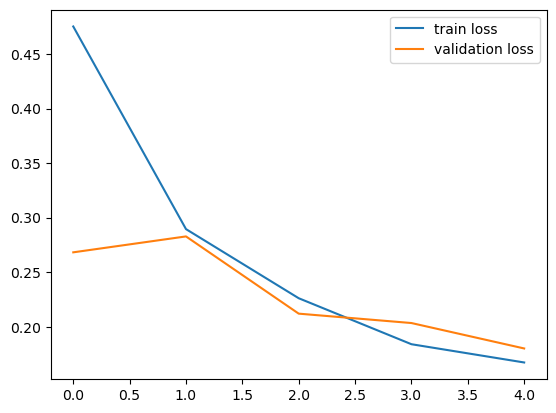

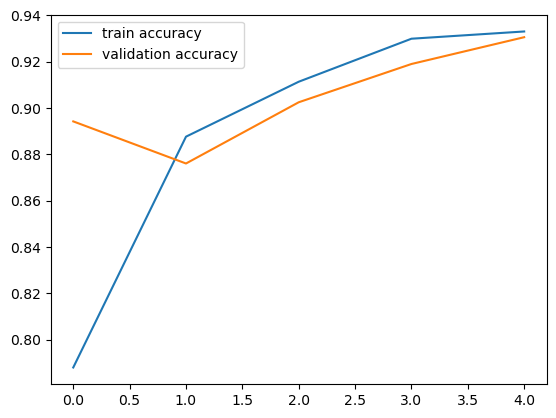

In [66]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [67]:
# Predictive System

Path of the image to be predicted: /Users/navneetyadav/Downloads/download (2).jpeg


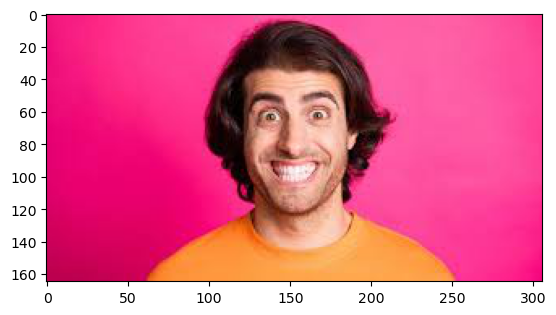

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.9852525  0.10090656]]
0
The person in the image is not wearing a mask


In [79]:
input_image_path = input('Path of the image to be predicted: ')

img = mpimg.imread(input_image_path)
imgplot = plt.imshow(img)
plt.show()


image = Image.open(input_image_path)
image = image.resize((128,128))
image = image.convert('RGB') 
image = np.array(image) 

input_image_scaled = image/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /Users/navneetyadav/Downloads/Navneet_PS.jpg


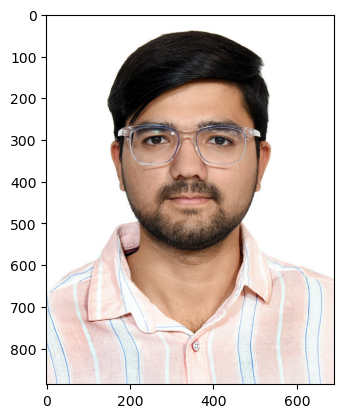

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
[[0.90905565 0.24759328]]
0
The person in the image is not wearing a mask


In [84]:
input_image_path = input('Path of the image to be predicted: ')

img = mpimg.imread(input_image_path)
imgplot = plt.imshow(img)
plt.show()


image = Image.open(input_image_path)
image = image.resize((128,128))
image = image.convert('RGB') # because some images are of grayscale(black and white) 
                                 # so we need to convert all that to RGB so that they all are of one kind
image = np.array(image) 

input_image_scaled = image/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [82]:
model.save('/Users/navneetyadav/Documents/Face_Mask_Detection_Project/my_model.h5')

In [83]:
!pip install streamlit

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
